In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('covid_data2.csv',index_col='date',parse_dates=True)
# data2= data[data['location']== 'New Zealand']

In [35]:
# data['total_deaths_per_hundred']= data['total_deaths_per_million']*10000

In [36]:
# data.rename(columns={ 'location' :'country'}, inplace=True)

In [37]:
# data['total_deaths_per_ratio']= data['total_deaths']/ data['population']

In [38]:
# df = data.sort_values('country')
# df['cid'] = (df.groupby(['country']).cumcount()==0).astype(int)
 
# df['cid'] = df['cid'].cumsum()

In [39]:
# ndf=df.loc[df['cid'] == 139] 


In [40]:
# ndf

In [41]:
# ndf.iloc[[-1]]

In [42]:
# list_of_countries=df['country'].unique()

In [43]:
# df2=pd.DataFrame(columns=df.columns)

# for  i in  df['cid'].unique():
#         temp= df[df['cid'] == i]
#         df2 = df2.append(temp.iloc[-1])
    


In [44]:
# df2.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covidforln.csv", index=False)

In [45]:
df3 = pd.read_csv('covidforln.csv')

In [46]:
import pandas as pd
import numpy as np
from datetime import date as dt

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [47]:
df3.isna().sum()

iso_code                                 0
continent                                0
country                                  0
total_cases                              0
new_cases                                0
total_deaths                             0
new_deaths                               0
total_cases_per_million                  0
new_cases_per_million                    0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_vaccinations_smoothed_per_million    0
stringency_index                         0
population_density                       0
median_age                               0
aged_65_older                            0
aged_70_older                            0
gdp_per_capita                           0
extreme_poverty                          0
cardiovasc_death_rate                    0
diabetes_prevalence                      0
female_smokers                           0
male_smokers                             0
handwashing

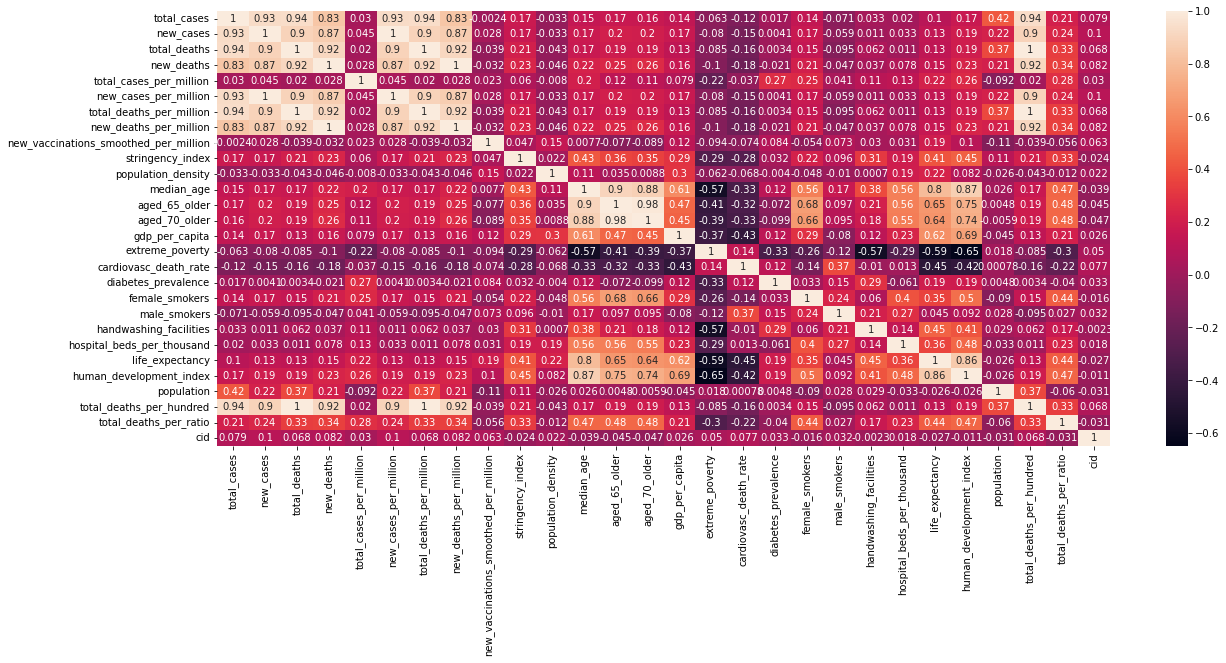

In [48]:
corr_matrix=df3.corr(method='pearson')   
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
# df3=df3.drop(['iso_code','aged_65_older','aged_70_older'], axis=1) 

In [50]:
# df3

In [51]:
# corr_matrix=df3.corr(method='pearson')   
# fig, ax = plt.subplots(figsize=(20, 8))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [52]:
df3= df3.drop(['iso_code','aged_65_older','aged_70_older','country','population','total_cases', 'new_cases_per_million','total_deaths',
               'new_deaths','new_deaths_per_million','total_deaths_per_hundred', 'total_deaths_per_ratio','cid'], axis=1) 

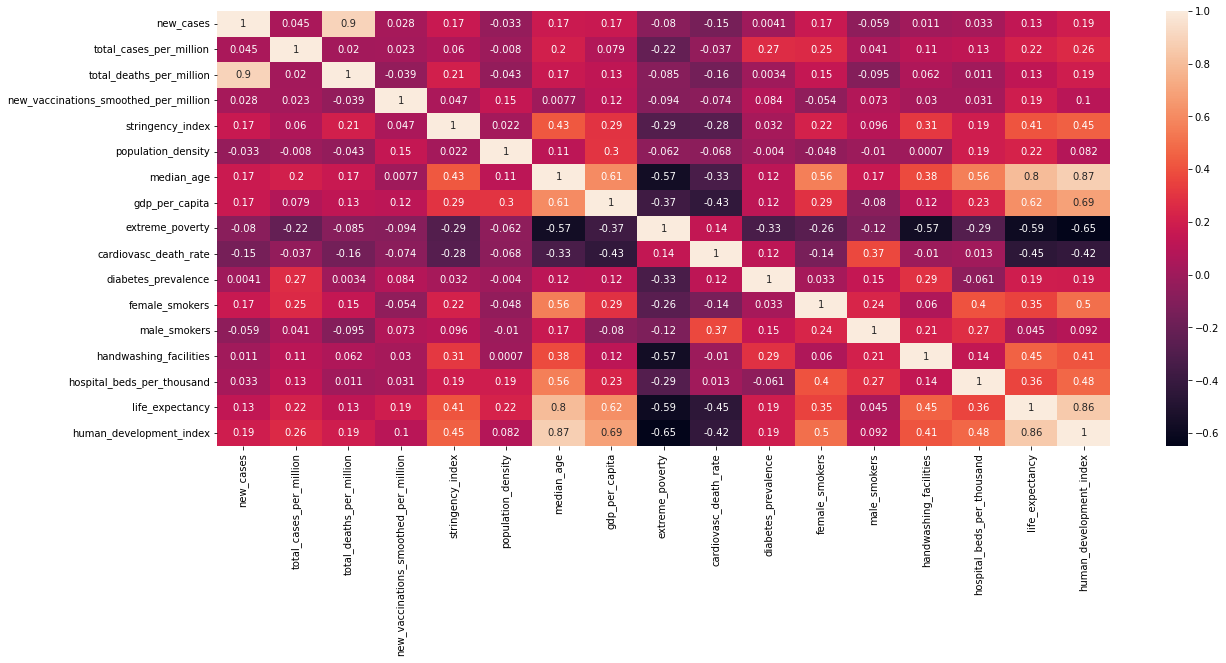

In [53]:
corr_matrix=df3.corr(method='pearson')   
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [54]:
# df3= df3.drop(['country'], axis=1) 

In [55]:
y = df3['total_deaths_per_million']
X = df3.drop(['total_deaths_per_million'], axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#categorical features and numerical ones are going to be treated differently
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [58]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_normalized = MinMaxtransformer.transform(X_train_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_train_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,new_cases,total_cases_per_million,new_vaccinations_smoothed_per_million,stringency_index,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.000000,0.003089,0.054672,0.463646,0.015428,0.435976,0.124113,0.027097,0.247719,0.329045,0.138952,0.326149,0.478228,0.262774,0.571258,0.683837
1,0.000744,0.003355,0.014838,0.780558,0.024078,0.158537,0.011449,0.721290,0.165377,0.111374,0.104784,0.179598,0.035057,0.167664,0.470272,0.264654
2,0.000000,0.010100,0.009467,0.634220,0.003574,0.216463,0.021016,0.767742,0.500063,0.099865,0.006834,0.652299,0.009498,0.167664,0.031371,0.236234
3,0.003707,0.112378,0.060256,0.597603,0.006012,0.685976,0.043462,0.001290,0.505349,0.160122,0.132118,0.518678,0.877110,0.416058,0.556319,0.632327
4,0.028932,0.147186,1.000000,0.963514,0.019588,0.472561,0.311621,0.005161,0.011845,0.194651,0.348519,0.386494,0.478228,0.210949,0.887063,0.932504


<class 'pandas.core.frame.DataFrame'>


In [59]:
from sklearn.preprocessing import MinMaxScaler

X_test_normalized = MinMaxtransformer.transform(X_test_num)
print(type(X_normalized))
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test_num.columns)
display(X_test_normalized.head())
print(type(X_test_normalized))

<class 'pandas.core.frame.DataFrame'>


,new_cases,total_cases_per_million,new_vaccinations_smoothed_per_million,stringency_index,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.000273,0.140590,0.060256,0.451264,0.028455,0.795732,0.338890,0.027097,0.245659,0.359851,0.138952,0.326149,0.478228,0.167664,0.687481,0.632327
1,0.008164,0.036472,0.060256,0.780558,0.003606,0.536585,0.097773,0.024516,0.365195,0.254909,0.022779,0.823276,0.792334,0.160584,0.699731,0.614565
2,0.000000,0.040397,0.187257,0.317044,0.001712,0.473356,0.119481,0.027097,0.245659,0.207177,0.138952,0.326149,0.478228,0.167664,0.818345,0.632327
3,0.000000,-0.000010,0.060256,0.000000,0.003142,0.079268,0.019405,0.632258,0.205951,0.161137,0.072893,0.261494,0.478116,0.043796,0.363908,0.239787
4,0.001397,0.003105,0.060256,0.524368,0.009607,0.091463,0.004163,0.920000,0.221704,0.099865,0.097950,0.232759,0.076842,0.087591,0.328055,0.158082


<class 'pandas.core.frame.DataFrame'>


In [60]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoded, columns=cols)
X_train_cat_encoded.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [61]:
X_test_cat.head(60)

,continent
9,North America
197,Africa
66,Europe
191,Africa
117,Africa
111,Africa
15,Asia
86,Asia
75,Africa
144,Asia


In [62]:
from sklearn.preprocessing import OneHotEncoder
 
encoded_test = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(encoded_test, columns=cols)
X_test_cat_encoded.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [63]:
X_train= pd.concat([X_normalized,X_train_cat_encoded], axis=1)
X_test= pd.concat([X_test_normalized,X_test_cat_encoded], axis=1)

In [64]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8293230255303333

In [66]:
X_train.columns

Index(['new_cases', 'total_cases_per_million',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'median_age', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [67]:
print(lm.coef_)

[ 4.37696862e-01 -9.48642353e-03 -1.65588103e-02  6.36237754e-03
  1.04149467e-02  7.20634600e-03 -1.93761511e-02  1.05374299e-02
 -7.36468012e-03  7.80775488e-03  1.58958350e-05 -1.84960639e-02
  9.35524146e-03 -2.53930515e-03 -1.80369616e-02  1.18480628e-02
  8.36378642e-03  8.00941868e-03  5.34624649e-03  2.01140140e-03
  1.64430504e-02]


In [35]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    return

In [36]:
models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]

models_automation(models, X_train, y_train, X_test, y_test)

LinearRegression: Train -> 0.8294386134150723, Test -> 0.7698868617298805
SGDRegressor: Train -> 0.07365292642596133, Test -> 0.098153471036044
DecisionTreeRegressor: Train -> 1.0, Test -> 0.9005196471938806
KNeighborsRegressor: Train -> 0.3069789859674191, Test -> -0.03404528357213299
